USED IDE -JUPYTER NOTEBOOK

PROBLEM 1#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
##importing data#
affair = pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LR\\Affairs.csv',sep = ",")

In [3]:
affair.head(10)

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
6,7,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,8,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,9,7,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9,10,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
affair.tail(10)

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
591,592,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
592,593,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
593,594,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
594,595,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
595,596,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
596,597,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,598,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,599,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,600,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
600,601,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [5]:
##removing 0th columns
affair = affair.iloc[:,1:]

In [6]:
affair.isna().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
dtype: int64

In [7]:
affair.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [8]:
##descretization "naffairs" column <6 as 0 and >=6 as 1
affair['naffairs']=(affair['naffairs']>=6 ).astype(int)

In [9]:
##model building #
logit_model = sm.logit('naffairs~kids+vryunhap+unhap+avgmarr+hapavg+vryhap+antirel+notrel+slghtrel+smerel+vryrel+yrsmarr1+yrsmarr2+yrsmarr3+yrsmarr4+yrsmarr5+yrsmarr6' , data = affair).fit()

Optimization terminated successfully.
         Current function value: 0.330606
         Iterations 7


In [10]:
#summary #
logit_model.summary2()
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.1572
Time:                        21:18:08   Log-Likelihood:                -198.69
converged:                       True   LL-Null:                       -235.75
Covariance Type:            nonrobust   LLR p-value:                 3.449e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0619        nan        nan        nan         nan         nan
kids          -0.4678      0.415     -1.126      0.260      -1.282       0.347
vryunhap       0.3007   8.89e+06   3.38e-08      1.000   -1.74e+07    1.74e+07
unhap          0.7714   8.89e+06   8.67e-08      1.000   -1.74e+07    1.74e+07
avgmarr       -0.4104   8.89e+06  -4.61e-08      1.000   -1.74e+07    1.74e+07
hapavg        -0.5855   8.89e+06  -6.58e-08      1.000   -1.74e+07    1.74e+07
vryhap        -1.1381   8.89e+06  -1.28e-07      1.000   -1.74e+07    1.74e+07
antirel        0.7474   1.33e+07   5.62e-08      1.000   -2.61e+07    2.61e+07
notrel         0.0096   1.33e+07    7.2e-10      1.000   -2.61e+07    2.61e+07
slghtrel       0.1645   1.33e+07   1.24e-08      1.000   -2.61e+07    2.61e+07
smerel        -1.1152   1.33e+07  -8.39e-08      1.000   -2.61e+07    2.61e+07
vryrel        -0.8682   1.33e+07  -6.53e-08      1.000   -2.61e+07    2.61e+07
yrsmarr1      -1.2054   1.17e+07  -1.03e-07      1.000   -2.29e+07    2.29e+07
yrsmarr2      -1.5317   1.17e+07  -1.31e-07      1.000   -2.29e+07    2.29e+07
yrsmarr3      -0.1509   1.17e+07  -1.29e-08      1.000   -2.29e+07    2.29e+07
yrsmarr4       0.2363   1.17e+07   2.02e-08      1.000   -2.29e+07    2.29e+07
yrsmarr5       0.8162   1.17e+07   6.97e-08      1.000   -2.29e+07    2.29e+07
yrsmarr6       0.7735   1.17e+07   6.61e-08      1.000   -2.29e+07    2.29e+07
==============================================================================
"""

In [11]:
pred = logit_model.predict(affair.iloc[: , 1:])

In [12]:
fpr,tpr,thresholds = roc_curve(affair.naffairs,pred)
optimal_idx =np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.1628475006948961

In [13]:
import pylab as pl

In [14]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i), '1-fpr':pd.Series(1-fpr,index=i),'tf': pd.Series(tpr-(1-fpr),index=i), 'thresholds':pd.Series(thresholds,index= i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
53,0.297505,0.7,0.702495,-0.002495,0.140325


[Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, ''),
 Text(140.0, 0, ''),
 Text(160.0, 0, '')]

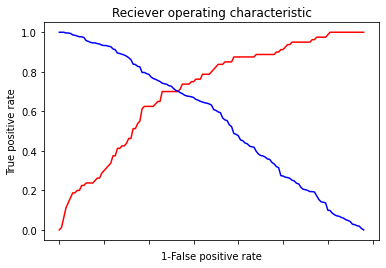

In [15]:
##plotting tpr vs 1-fpr
fig, ax= pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False positive rate')
pl.ylabel('True positive rate')
pl.title('Reciever operating characteristic')
ax.set_xticklabels([])

In [16]:
roc_auc = auc(fpr,tpr)
print('Area under the ROC curve:%f'% roc_auc)

Area under the ROC curve:0.772061


In [17]:
##filling all cell with zeros#
affair['pred']=np.zeros(601)

In [18]:
##taking threshold values# and above the prob value will be taken as correct value#
affair.loc[pred>optimal_threshold,'pred']=1

In [19]:
##classification report#
classification = classification_report(affair['pred'], affair['naffairs'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83       415
         1.0       0.68      0.29      0.41       186

    accuracy                           0.74       601
   macro avg       0.71      0.61      0.62       601
weighted avg       0.72      0.74      0.70       601



In [20]:
###splitting into test nd train data#
train_data , test_data = train_test_split(affair, test_size=0.3)

In [21]:
model = sm.logit('naffairs~kids+vryunhap+unhap+avgmarr+hapavg+vryhap+antirel+notrel+slghtrel+smerel+vryrel+yrsmarr1+yrsmarr2+yrsmarr3+yrsmarr4+yrsmarr5+yrsmarr6' , data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.334353
         Iterations 8


In [22]:
model.summary2
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  420
Model:                          Logit   Df Residuals:                      405
Method:                           MLE   Df Model:                           14
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  0.1761
Time:                        21:18:19   Log-Likelihood:                -140.43
converged:                       True   LL-Null:                       -170.45
Covariance Type:            nonrobust   LLR p-value:                 1.155e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9729        nan        nan        nan         nan         nan
kids          -0.5792      0.495     -1.171      0.242      -1.549       0.390
vryunhap       0.5218        nan        nan        nan         nan         nan
unhap          0.8605        nan        nan        nan         nan         nan
avgmarr       -0.3766        nan        nan        nan         nan         nan
hapavg        -0.7087        nan        nan        nan         nan         nan
vryhap        -1.2700        nan        nan        nan         nan         nan
antirel        0.7495        nan        nan        nan         nan         nan
notrel        -0.0032        nan        nan        nan         nan         nan
slghtrel       0.0686        nan        nan        nan         nan         nan
smerel        -1.0613        nan        nan        nan         nan         nan
vryrel        -0.7265        nan        nan        nan         nan         nan
yrsmarr1      -1.4610        nan        nan        nan         nan         nan
yrsmarr2      -1.6172        nan        nan        nan         nan         nan
yrsmarr3      -0.1080        nan        nan        nan         nan         nan
yrsmarr4       0.5586        nan        nan        nan         nan         nan
yrsmarr5       0.8638        nan        nan        nan         nan         nan
yrsmarr6       0.7910        nan        nan        nan         nan         nan
==============================================================================
"""

In [23]:
#prediction on test data#
test_pred  = model.predict(test_data.iloc[:,1:])

In [24]:
##creating new column for storing prediction#
#filling all the cell with zeros
test_data['test_pred'] = np.zeros(181)

In [25]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 #
test_data.loc[test_pred>optimal_threshold,'test_pred']=1


In [26]:
##confusion matrix#
confusion_matrix =  pd.crosstab(test_data.test_pred, test_data['naffairs'])
confusion_matrix

naffairs,0,1
test_pred,,
0.0,121,7
1.0,39,14


In [27]:
accuracy_test  = accuracy_score(test_data['naffairs'], test_data.test_pred)
accuracy_test

0.7458563535911602

In [28]:
##classification report#
classification = classification_report(test_data['test_pred'], test_data['naffairs'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84       128
         1.0       0.67      0.26      0.38        53

    accuracy                           0.75       181
   macro avg       0.71      0.60      0.61       181
weighted avg       0.73      0.75      0.71       181



In [35]:
##roc curve and AUC#
fpr,tpr,threshold = metrics.roc_curve(test_data['naffairs'],test_pred)

Text(0, 0.5, 'True positive rate')

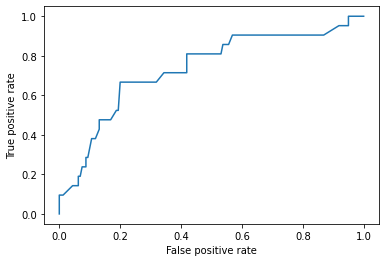

In [36]:
##ROC plot#
plt.plot(fpr,tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [37]:
roc_auc_test = metrics.auc(fpr,tpr)
roc_auc_test

0.7340773809523811

In [38]:
##prediction on test data#
train_pred = model.predict(train_data.iloc[:,1:])

In [39]:
##create new columns#
##filling all  the cell with colums#
train_data['train_pred'] = np.zeros(420)

In [40]:
# taking threshold value and above the prob value will be treated as correct value #
train_data.loc[train_pred>optimal_threshold, 'train_pred'] =1

In [41]:
##confusion matrix#
confusion_matrix = pd.crosstab(train_data.train_pred, train_data['naffairs'])
confusion_matrix

naffairs,0,1
train_pred,,
0.0,260,19
1.0,101,40


In [42]:
##accuracy score#
accuracy_train = accuracy_score(train_data['naffairs'], train_data.train_pred)
accuracy_train

0.7142857142857143

PROBLEM 2#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
##LOADING DATASET#
ads= pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LR\\advertising.csv',sep = "," )

In [3]:
ads.head(10)

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/06/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19/05/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28/01/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,7/03/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18/04/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,11/07/2016 1:42,0


In [4]:
ads.tail(10)

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
990,35.79,44,33813.08,165.62,Enterprise-wide tangible model,North Katie,1,Tonga,20/04/2016 13:36,1
991,38.96,38,36497.22,140.67,Versatile mission-critical application,Mauricefurt,1,Comoros,21/07/2016 16:02,1
992,69.17,40,66193.81,123.62,Extended leadingedge solution,New Patrick,0,Montenegro,6/03/2016 11:36,1
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1,Isle of Man,11/02/2016 23:45,0
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,4/04/2016 3:57,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/02/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/04/2016 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/02/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/03/2016 2:35,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,3/06/2016 21:43,1


In [5]:
##selecting required columns#
ads = ads.iloc[:,[0,1,2,3,6,9]]

In [6]:
ads

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [7]:
ads.isna().sum()##cheking na values#

Daily_Time_ Spent _on_Site    0
Age                           0
Area_Income                   0
Daily Internet Usage          0
Male                          0
Clicked_on_Ad                 0
dtype: int64

In [8]:
##renaming colums#
cols = {'Daily_Time_ Spent _on_Site':'Daily_Time_Spent_on_Site' ,'Daily Internet Usage':'Daily_Internet_Usage' }
ads.rename(cols , axis =1 , inplace = True)

In [9]:
ads.columns

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Male', 'Clicked_on_Ad'],
      dtype='object')

In [10]:
##model building#
logit_model = sm.logit('Clicked_on_Ad ~  Daily_Time_Spent_on_Site + Age + Area_Income + Daily_Internet_Usage + Male',
                       data = ads).fit()

Optimization terminated successfully.
         Current function value: 0.090904
         Iterations 10


In [11]:
logit_model.summary2() #for AIC model#
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.8689
Time:                        20:44:54   Log-Likelihood:                -90.904
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.136e-258
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   27.3606      2.736      9.999      0.000      21.997      32.724
Daily_Time_Spent_on_Site    -0.1927      0.021     -9.286      0.000      -0.233      -0.152
Age                          0.1709      0.026      6.607      0.000       0.120       0.222
Area_Income                 -0.0001   1.88e-05     -7.245      0.000      -0.000   -9.93e-05
Daily_Internet_Usage        -0.0635      0.007     -9.390      0.000      -0.077      -0.050
Male                        -0.4217      0.404     -1.043      0.297      -1.214       0.371
============================================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [12]:
preds = logit_model.predict(ads.iloc[:,:5])

In [13]:
fpr,tpr,thresholds = roc_curve(ads.Clicked_on_Ad,preds)
optimal_idx =np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6326111998951847

In [14]:
import pylab as pl

In [15]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i), '1-fpr':pd.Series(1-fpr,index=i),'tf': pd.Series(tpr-(1-fpr),index=i), 'thresholds':pd.Series(thresholds,index= i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
17,0.036,0.966,0.964,0.002,0.370638


[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

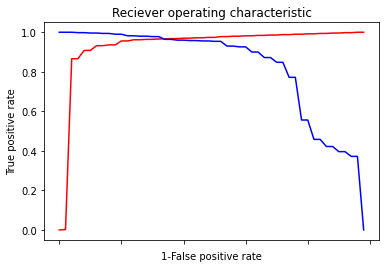

In [24]:
##plotting tpr vs 1-fpr
fig, ax= pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False positive rate')
pl.ylabel('True positive rate')
pl.title('Reciever operating characteristic')
ax.set_xticklabels([])

In [25]:
roc_auc = auc(fpr,tpr)
print('Area under the ROC curve:%f'% roc_auc)

Area under the ROC curve:0.991800


In [26]:
ads["preds"] = np.zeros(1000)

In [27]:
# taking threshold value and above the prob value will be treated as correct value 
ads.loc[preds>optimal_threshold,'preds']=1

In [30]:
##classification report#
classification = classification_report(ads['preds'], ads['Clicked_on_Ad'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       518
         1.0       0.95      0.99      0.97       482

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [31]:
##splitting into test and train data#
train_data , test_data = train_test_split(ads,test_size = 0.3)

In [34]:
model = sm.logit('Clicked_on_Ad ~  Daily_Time_Spent_on_Site + Age + Area_Income + Daily_Internet_Usage + Male',
                       data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.080204
         Iterations 10


In [36]:
model.summary2 #for AIC
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            5
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.8843
Time:                        20:47:53   Log-Likelihood:                -56.143
converged:                       True   LL-Null:                       -485.13
Covariance Type:            nonrobust   LLR p-value:                3.304e-183
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   28.4711      3.583      7.947      0.000      21.449      35.493
Daily_Time_Spent_on_Site    -0.2042      0.027     -7.579      0.000      -0.257      -0.151
Age                          0.1881      0.034      5.482      0.000       0.121       0.255
Area_Income                 -0.0001    2.4e-05     -6.056      0.000      -0.000   -9.84e-05
Daily_Internet_Usage        -0.0652      0.009     -7.583      0.000      -0.082      -0.048
Male                        -0.8850      0.528     -1.676      0.094      -1.920       0.150
============================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
#prediction on test data#
test_pred  = model.predict(test_data.iloc[:,:5])

In [38]:
##creating new column for storing prediction#
#filling all the cell with zeros
test_data['test_pred'] = np.zeros(300)

In [39]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 #
test_data.loc[test_pred>optimal_threshold,'test_pred']=1


In [40]:
##confusion matrix#
confusion_matrix =  pd.crosstab(test_data.test_pred, test_data['Clicked_on_Ad'])
confusion_matrix

Clicked_on_Ad,0,1
test_pred,,
0.0,153,11
1.0,2,134


In [41]:
accuracy_test  = accuracy_score(test_data['Clicked_on_Ad'], test_data.test_pred)
accuracy_test

0.9566666666666667

In [42]:
##classification report#
classification = classification_report(test_data['test_pred'], test_data['Clicked_on_Ad'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       164
         1.0       0.92      0.99      0.95       136

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [43]:
##roc curve and AUC#
fpr,tpr,threshold = metrics.roc_curve(test_data['Clicked_on_Ad'],test_pred)

Text(0, 0.5, 'True positive rate')

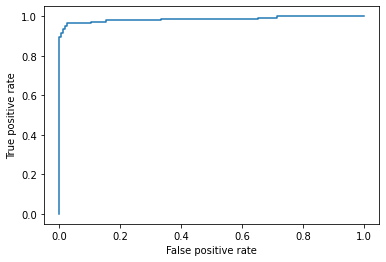

In [44]:
##ROC plot#
plt.plot(fpr,tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [45]:
roc_auc_test = metrics.auc(fpr,tpr)
roc_auc_test

0.9854505005561734

In [46]:
##prediction on test data#
train_pred = model.predict(train_data.iloc[:,:5])

In [47]:
##create new columns#
##filling all  the cell with colums#
train_data['train_pred'] = np.zeros(700)

In [49]:
# taking threshold value and above the prob value will be treated as correct value #
train_data.loc[train_pred>optimal_threshold, 'train_pred'] =1

In [50]:
##confusion matrix#
confusion_matrix = pd.crosstab(train_data.train_pred, train_data['Clicked_on_Ad'])
confusion_matrix

Clicked_on_Ad,0,1
train_pred,,
0.0,342,15
1.0,3,340


In [51]:
##accuracy score#
accuracy_train = accuracy_score(train_data['Clicked_on_Ad'], train_data.train_pred)
accuracy_train

0.9742857142857143

PROBLEM 3#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
##LOADING DATASET#
election = pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LR\\election_data.csv')

In [4]:
election.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


In [5]:
election.tail()

,Election-id,Result,Year,Amount Spent,Popularity Rank
6,150.0,0.0,35.0,4.20,4.0
7,743.0,1.0,39.0,5.66,2.0
8,612.0,1.0,42.0,4.32,3.0
9,206.0,1.0,44.0,3.26,3.0
10,792.0,0.0,50.0,4.52,4.0


In [7]:
##removing unwated row#
election=election.iloc[1:,1:]

In [8]:
election.head()

,Result,Year,Amount Spent,Popularity Rank
1,0.0,32.0,3.81,3.0
2,1.0,48.0,6.32,2.0
3,1.0,51.0,3.67,1.0
4,0.0,40.0,2.93,4.0
5,1.0,52.0,3.60,1.0


In [9]:
election.describe()

,Result,Year,Amount Spent,Popularity Rank
count,10.000000,10.000000,10.000000,10.000000
mean,0.600000,43.300000,4.229000,2.700000
std,0.516398,6.912951,1.055351,1.159502
min,0.000000,32.000000,2.930000,1.000000
25%,0.000000,39.250000,3.617500,2.000000
50%,1.000000,43.000000,4.005000,3.000000
75%,1.000000,49.500000,4.470000,3.750000
max,1.000000,52.000000,6.320000,4.000000


In [11]:
election.isna().sum() #checking missing value#

Result             0
Year               0
Amount Spent       0
Popularity Rank    0
dtype: int64

In [12]:
##altering column names for analysis#
cols={'Amount Spent':'Amount_Spent','Popularity Rank':'Popularity_Rank'}
election.rename(cols,axis=1, inplace=True)

In [13]:
election.columns

Index(['Result', 'Year', 'Amount_Spent', 'Popularity_Rank'], dtype='object')

In [19]:
##model building#
logit= sm.logit('Result ~  Year + Amount_Spent + Popularity_Rank',
                       data = election)
logit_model=logit.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31


In [20]:
logit_model.summary2() #for AIC model#
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                   10
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Aug 2022   Pseudo R-squ.:                   1.000
Time:                        10:25:30   Log-Likelihood:            -1.3750e-06
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                  0.003740
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9397   3.14e+08  -9.36e-09      1.000   -6.16e+08    6.16e+08
Year                5.2768   1.26e+07    4.2e-07      1.000   -2.46e+07    2.46e+07
Amount_Spent        5.8153   2.37e+07   2.45e-07      1.000   -4.64e+07    4.64e+07
Popularity_Rank   -75.1724   1.05e+08  -7.15e-07      1.000   -2.06e+08    2.06e+08
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [23]:
pred= logit_model.predict(election.iloc[:,1:])

In [25]:
fpr,tpr,thresholds = roc_curve(election.Result,pred)
optimal_idx =np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9999999886004559

In [26]:
import pylab as pl

In [27]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i), '1-fpr':pd.Series(1-fpr,index=i),'tf': pd.Series(tpr-(1-fpr),index=i), 'thresholds':pd.Series(thresholds,index= i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
2,0.0,1.0,1.0,0.0,1.0


[Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, ''),
 Text(2.5, 0, ''),
 Text(3.0, 0, ''),
 Text(3.5, 0, '')]

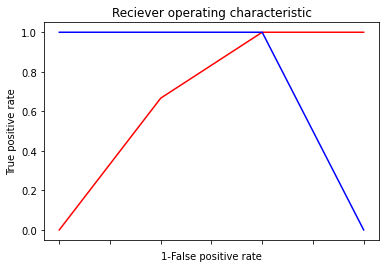

In [28]:
##plotting tpr vs 1-fpr
fig, ax= pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False positive rate')
pl.ylabel('True positive rate')
pl.title('Reciever operating characteristic')
ax.set_xticklabels([])

In [29]:
roc_auc = auc(fpr,tpr)
print('Area under the ROC curve:%f'% roc_auc)

Area under the ROC curve:1.000000


In [30]:
election["pred"] = np.zeros(10)

In [32]:
# taking threshold value and above the prob value will be treated as correct value 
election.loc[pred>optimal_threshold,'pred']=1

In [34]:
##classification report#
classification = classification_report(election['pred'], election['Result'])
print(classification)

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [35]:
##spliting data into train and test data#
train_data, test_data =train_test_split(election,test_size=0.3)

In [36]:
final_model = sm.logit('Result ~  Year + Amount_Spent + Popularity_Rank',
                       data = election)
model=logit.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31


In [37]:
model.summary2() #for AIC model#
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                   10
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Aug 2022   Pseudo R-squ.:                   1.000
Time:                        10:34:12   Log-Likelihood:            -1.3750e-06
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                  0.003740
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.9397   3.14e+08  -9.36e-09      1.000   -6.16e+08    6.16e+08
Year                5.2768   1.26e+07    4.2e-07      1.000   -2.46e+07    2.46e+07
Amount_Spent        5.8153   2.37e+07   2.45e-07      1.000   -4.64e+07    4.64e+07
Popularity_Rank   -75.1724   1.05e+08  -7.15e-07      1.000   -2.06e+08    2.06e+08
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [38]:
#prediction on test data#
test_pred  = model.predict(test_data.iloc[:,1:])


In [39]:
##creating new column for storing prediction#
#filling all the cell with zeros
test_data['test_pred'] = np.zeros(3)

In [40]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 #
test_data.loc[test_pred>optimal_threshold,'test_pred']=1

In [41]:
##confusion matrix#
confusion_matrix =  pd.crosstab(test_data.test_pred, test_data['Result'])
confusion_matrix

Result,0.0,1.0
test_pred,,
0.0,1,0
1.0,0,2


In [42]:
accuracy_test  = accuracy_score(test_data['Result'], test_data.test_pred)
accuracy_test

1.0

In [43]:
##classification report#
classification = classification_report(test_data['test_pred'], test_data['Result'])
print(classification)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [44]:
##roc curve and AUC#
fpr,tpr,threshold = metrics.roc_curve(test_data['Result'],test_pred)

Text(0, 0.5, 'True positive rate')

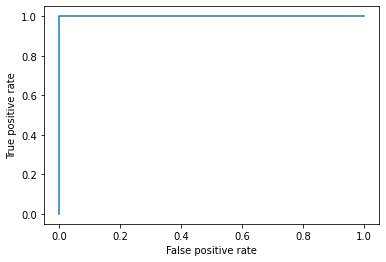

In [45]:
##ROC plot#
plt.plot(fpr,tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [46]:
roc_auc_test = metrics.auc(fpr,tpr)
roc_auc_test

1.0

In [47]:
##prediction on test data#
train_pred = model.predict(train_data.iloc[:,1:])

In [48]:
##create new columns#
##filling all  the cell with colums#
train_data['train_pred'] = np.zeros(7)

In [49]:
# taking threshold value and above the prob value will be treated as correct value #
train_data.loc[train_pred>optimal_threshold, 'train_pred'] =1

In [51]:
##confusion matrix#
confusion_matrix = pd.crosstab(train_data.train_pred, train_data['Result'])
confusion_matrix

Result,0.0,1.0
train_pred,,
0.0,3,1
1.0,0,3


In [53]:
##accuracy score#
accuracy_train = accuracy_score(train_data['Result'], train_data.train_pred)
accuracy_train

0.8571428571428571

PROBLEM 4#

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [61]:
##LOADING DATASET#
bank= pd.read_csv('D:\\DATA SCIENCE ASSIGNMENT\\Datasets_LR\\bank_data.csv', sep=',')

In [62]:
bank.head(5)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
bank.tail() 

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
45210,37,0,2971,0,0,361,2,188,11,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
bank.isna().sum()##checking for missing data#

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [66]:
cols_data = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown'] ##storing as columns as cols_data#

In [68]:
##model building#
logit_model= sm.Logit(bank['y'],bank[cols_data]).fit()

Optimization terminated successfully.
         Current function value: 0.250376
         Iterations 8


In [69]:
logit_model.summary2() #for AIC model#
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45183
Method:                           MLE   Df Model:                           27
Date:                Wed, 31 Aug 2022   Pseudo R-squ.:                  0.3062
Time:                        10:51:49   Log-Likelihood:                -11320.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0004      0.002      0.168      0.867      -0.004       0.005
default            -0.1822      0.161     -1.130      0.259      -0.498       0.134
balance          1.872e-05   4.85e-06      3.860      0.000    9.21e-06    2.82e-05
housing            -0.7756      0.040    -19.618      0.000      -0.853      -0.698
loan               -0.5720      0.058     -9.842      0.000      -0.686      -0.458
duration            0.0040   6.26e-05     64.618      0.000       0.004       0.004
campaign           -0.1093      0.010    -11.037      0.000      -0.129      -0.090
pdays               0.0001      0.000      0.479      0.632      -0.000       0.001
previous            0.0104      0.006      1.620      0.105      -0.002       0.023
poutfailure        -1.1544        nan        nan        nan         nan         nan
poutother          -0.9121        nan        nan        nan         nan         nan
poutsuccess         1.1541        nan        nan        nan         nan         nan
poutunknown        -1.4106        nan        nan        nan         nan         nan
con_cellular       -0.3529        nan        nan        nan         nan         nan
con_telephone      -0.4515        nan        nan        nan         nan         nan
con_unknown        -1.5187        nan        nan        nan         nan         nan
divorced           -0.7786        nan        nan        nan         nan         nan
married            -0.9419        nan        nan        nan         nan         nan
single             -0.6025        nan        nan        nan         nan         nan
joadmin.           -0.0263        nan        nan        nan         nan         nan
joblue.collar      -0.4899        nan        nan        nan         nan         nan
joentrepreneur     -0.4301        nan        nan        nan         nan         nan
johousemaid        -0.6005        nan        nan        nan         nan         nan
jomanagement       -0.0848        nan        nan        nan         nan         nan
joretired           0.3087        nan        nan        nan         nan         nan
joself.employed    -0.3032        nan        nan        nan         nan         nan
joservices         -0.3597        nan        nan        nan         nan         nan
jostudent           0.4859        nan        nan        nan         nan         nan
jotechnician       -0.2590        nan        nan        nan         nan         nan
jounemployed       -0.2412        nan        nan        nan         nan         nan
jounknown          -0.3228        nan        nan        nan         nan         nan
===================================================================================
"""

In [70]:
pred= logit_model.predict(bank.iloc[:,:31])

In [71]:
fpr,tpr,thresholds = roc_curve(bank.y,pred)
optimal_idx =np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.1147422078766177

In [72]:
import pylab as pl

In [73]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i), '1-fpr':pd.Series(1-fpr,index=i),'tf': pd.Series(tpr-(1-fpr),index=i), 'thresholds':pd.Series(thresholds,index= i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
4619,0.183358,0.8166,0.816642,-0.000042,0.112521


[Text(-1000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(6000.0, 0, ''),
 Text(7000.0, 0, '')]

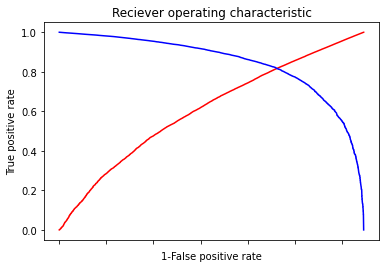

In [74]:
##plotting tpr vs 1-fpr
fig, ax= pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False positive rate')
pl.ylabel('True positive rate')
pl.title('Reciever operating characteristic')
ax.set_xticklabels([])

In [75]:
roc_auc = auc(fpr,tpr)
print('Area under the ROC curve:%f'% roc_auc)

Area under the ROC curve:0.890843


In [76]:
# filling all the cells with zeroes#
bank["pred"] = np.zeros(45211)

In [77]:
# taking threshold value and above the prob value will be treated as correct value 
bank.loc[pred>optimal_threshold,'pred']=1

In [78]:
##classification report#
classification = classification_report(bank['pred'], bank['y'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     33791
         1.0       0.81      0.38      0.52     11420

    accuracy                           0.82     45211
   macro avg       0.82      0.67      0.70     45211
weighted avg       0.82      0.82      0.80     45211



In [79]:
##splitting data into test and train#
train_data , test_data = train_test_split(bank, test_size= 0.3)

In [80]:
# Model building 
model= sm.Logit(train_data['y'],train_data[cols_data]).fit()

Optimization terminated successfully.
         Current function value: 0.251068
         Iterations 8


In [81]:
model.summary2() #for AIC model#
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45183
Method:                           MLE   Df Model:                           27
Date:                Wed, 31 Aug 2022   Pseudo R-squ.:                  0.3062
Time:                        11:00:06   Log-Likelihood:                -11320.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0004      0.002      0.168      0.867      -0.004       0.005
default            -0.1822      0.161     -1.130      0.259      -0.498       0.134
balance          1.872e-05   4.85e-06      3.860      0.000    9.21e-06    2.82e-05
housing            -0.7756      0.040    -19.618      0.000      -0.853      -0.698
loan               -0.5720      0.058     -9.842      0.000      -0.686      -0.458
duration            0.0040   6.26e-05     64.618      0.000       0.004       0.004
campaign           -0.1093      0.010    -11.037      0.000      -0.129      -0.090
pdays               0.0001      0.000      0.479      0.632      -0.000       0.001
previous            0.0104      0.006      1.620      0.105      -0.002       0.023
poutfailure        -1.1544        nan        nan        nan         nan         nan
poutother          -0.9121        nan        nan        nan         nan         nan
poutsuccess         1.1541        nan        nan        nan         nan         nan
poutunknown        -1.4106        nan        nan        nan         nan         nan
con_cellular       -0.3529        nan        nan        nan         nan         nan
con_telephone      -0.4515        nan        nan        nan         nan         nan
con_unknown        -1.5187        nan        nan        nan         nan         nan
divorced           -0.7786        nan        nan        nan         nan         nan
married            -0.9419        nan        nan        nan         nan         nan
single             -0.6025        nan        nan        nan         nan         nan
joadmin.           -0.0263        nan        nan        nan         nan         nan
joblue.collar      -0.4899        nan        nan        nan         nan         nan
joentrepreneur     -0.4301        nan        nan        nan         nan         nan
johousemaid        -0.6005        nan        nan        nan         nan         nan
jomanagement       -0.0848        nan        nan        nan         nan         nan
joretired           0.3087        nan        nan        nan         nan         nan
joself.employed    -0.3032        nan        nan        nan         nan         nan
joservices         -0.3597        nan        nan        nan         nan         nan
jostudent           0.4859        nan        nan        nan         nan         nan
jotechnician       -0.2590        nan        nan        nan         nan         nan
jounemployed       -0.2412        nan        nan        nan         nan         nan
jounknown          -0.3228        nan        nan        nan         nan         nan
===================================================================================
"""

In [82]:
#prediction on test data#
test_pred  = model.predict(test_data.iloc[:,:31])


In [85]:
test_data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y,pred,test_pred
13671,37,0,224,1,0,128,2,-1,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
35691,31,0,691,1,0,198,1,-1,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0
38569,38,0,5774,1,0,406,4,359,5,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4318,36,0,141,1,0,165,5,-1,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0
12887,51,0,1392,0,0,511,3,-1,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18046,57,0,3819,0,0,1001,2,-1,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
19218,48,0,1526,0,0,273,2,-1,0,0,...,0,0,0,0,1,0,0,0,1.0,0.0
17588,51,0,5,0,0,600,2,-1,0,0,...,0,0,0,0,0,0,0,1,1.0,0.0
2047,49,1,15,0,0,290,5,-1,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [86]:
##creating new column for storing prediction#
#filling all the cell with zeros
test_data['test_pred'] = np.zeros(13564)

In [87]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 #
test_data.loc[test_pred>optimal_threshold,'test_pred']=1

In [88]:
##confusion matrix#
confusion_matrix =  pd.crosstab(test_data.test_pred, test_data['y'])
confusion_matrix

y,0,1
test_pred,,
0.0,9781,287
1.0,2208,1288


In [89]:
accuracy_test  = accuracy_score(test_data['y'], test_data.test_pred)
accuracy_test

0.8160572102624595

In [90]:
##classification report#
classification = classification_report(test_data['test_pred'], test_data['y'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89     10068
         1.0       0.82      0.37      0.51      3496

    accuracy                           0.82     13564
   macro avg       0.82      0.67      0.70     13564
weighted avg       0.82      0.82      0.79     13564



In [91]:
##roc curve and AUC#
fpr,tpr,threshold = metrics.roc_curve(test_data['y'],test_pred)

Text(0, 0.5, 'True positive rate')

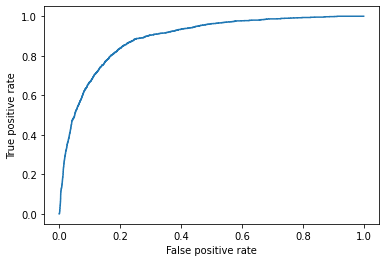

In [92]:
##ROC plot#
plt.plot(fpr,tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [93]:
roc_auc_test = metrics.auc(fpr,tpr)
roc_auc_test

0.8895874128003579

In [94]:
##prediction on test data#
train_pred = model.predict(train_data.iloc[:,:31])

In [95]:
##create new columns#
##filling all  the cell with colums#
train_data['train_pred'] = np.zeros(31647)

In [96]:
# taking threshold value and above the prob value will be treated as correct value #
train_data.loc[train_pred>optimal_threshold, 'train_pred'] =1

In [97]:
##confusion matrix#
confusion_matrix = pd.crosstab(train_data.train_pred, train_data['y'])
confusion_matrix

y,0,1
train_pred,,
0.0,22903,707
1.0,5030,3007


In [98]:
##accuracy score#
accuracy_train = accuracy_score(train_data['y'], train_data.train_pred)
accuracy_train

0.8187189939014756

##############################################################